In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Часть 1

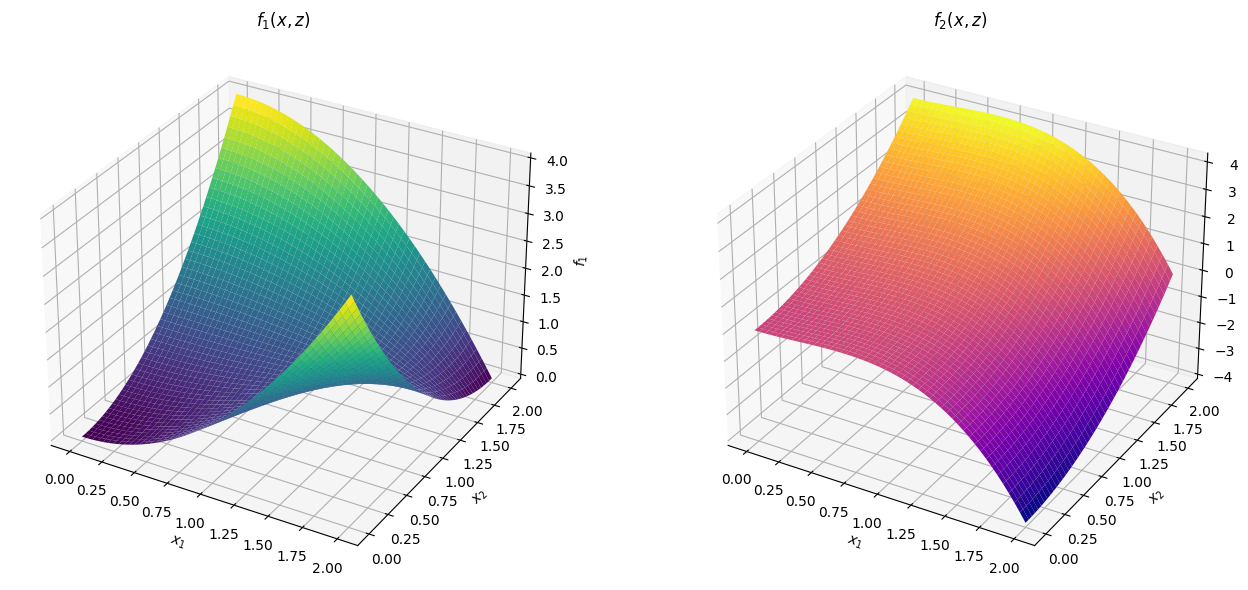

In [93]:
def f1(x1, x2, z1, z2):
    return x1**2 + x2**2 - x2 * (z1**2 - z2**2)

def f2(x1, x2, z1, z2):
    return x1**2 + x2**2 - x1 * (z1**2 + z2**2)

# сетка x1, x2
x1 = np.linspace(0, 2, 50)
x2 = np.linspace(0, 2, 50)
z1 = np.linspace(0, 2, 50)
z2 = np.linspace(0, 2, 50)

X1, X2 = np.meshgrid(x1, x2)
Z1, Z2 = np.meshgrid(z1, z2)

F1 = f1(X1, X2, Z1[0], Z2[0])
F2 = f2(X1, X2, Z1[0], Z2[0])

# 3D plot для f1
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, F1, cmap='viridis')
ax1.set_title('$f_1(x, z)$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f_1$')

# 3D plot для f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, F2, cmap='plasma')
ax2.set_title('$f_2(x, z)$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f_2$')

plt.tight_layout()
plt.show()


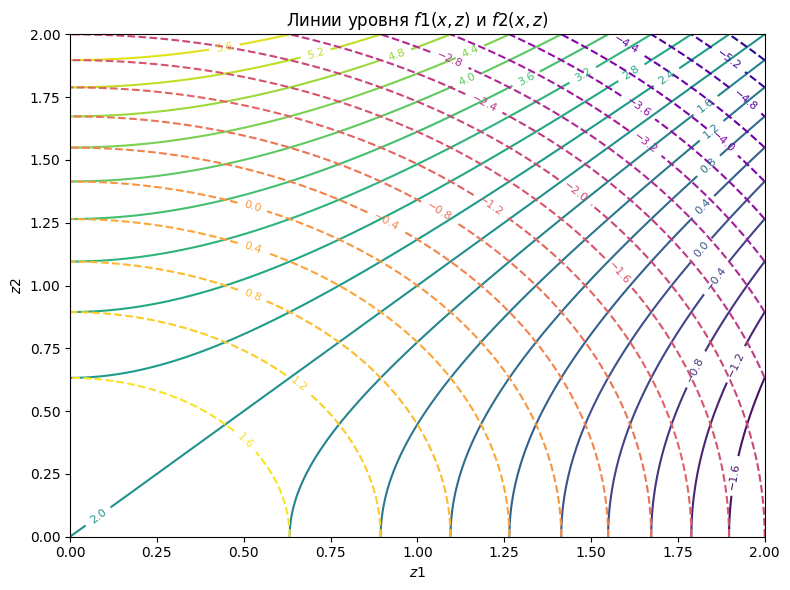

In [94]:
# Функции задержек f1 и f2
def f1(x1, x2, z1, z2):
    return x1**2 + x2**2 - x2 * (z1**2 - z2**2)

def f2(x1, x2, z1, z2):
    return x1**2 + x2**2 - x1 * (z1**2 + z2**2)

x1, x2 = 1, 1  # фиксированные значения

# Массивы значений z1 и z2
z1_vals = np.linspace(0, 2, 100)
z2_vals = np.linspace(0, 2, 100)
Z1, Z2 = np.meshgrid(z1_vals, z2_vals)

F1 = f1(x1, x2, Z1, Z2)
F2 = f2(x1, x2, Z1, Z2)

fig, ax1 = plt.subplots(figsize=(8, 6))

# Линии уровня для f1
contour1 = ax1.contour(Z1, Z2, F1, levels=20, cmap='viridis')
ax1.clabel(contour1, inline=True, fontsize=8)

# Линии уровня для f2
contour2 = ax1.contour(Z1, Z2, F2, levels=20, cmap='plasma', linestyles='dashed')
ax1.clabel(contour2, inline=True, fontsize=8)

ax1.set_title('Линии уровня $f1(x, z)$ и $f2(x, z)$')
ax1.set_xlabel('$z1$')
ax1.set_ylabel('$z2$')

plt.tight_layout()
plt.show()


График линий уровня, который мы строим, помогает визуализировать, как значения функций f1(x, z)  и f2(x, z)  изменяются в зависимости от переменных z1  и z2 , при фиксированных значениях x1  и x2 .

### Что на осях?

- **Ось X**  z1: Показывает возможные значения переменной z1  на интервале [0, 2].
- **Ось Y** z2: Показывает возможные значения переменной z2  на интервале [0, 2].

### Как строится график?

1. **Сетка значений**:
   - Сначала создаётся сетка значений для переменных z1  и z2  с помощью функции `np.meshgrid`. Это означает, что для каждого значения z1  мы рассматриваем все возможные значения z2  (и наоборот), создавая тем самым двумерное пространство.
   - Пример: если z1  и z2  меняются от 0 до 2 с шагом 0.02, мы получим сетку 100x100 точек.

2. **Вычисление значений функций**:
   - Для каждой точки на этой сетке мы вычисляем значения функций f1(x1, x2, z1, z2)  и f2(x1, x2, z1, z2) .
   - Результаты вычислений для всех точек на сетке записываются в двумерные массивы F1  и F2 .


Равновесие по Нэшу будет в точке, где линии уровня перпендикулярны

# Часть 2
(поменялись функции f1 и f2)

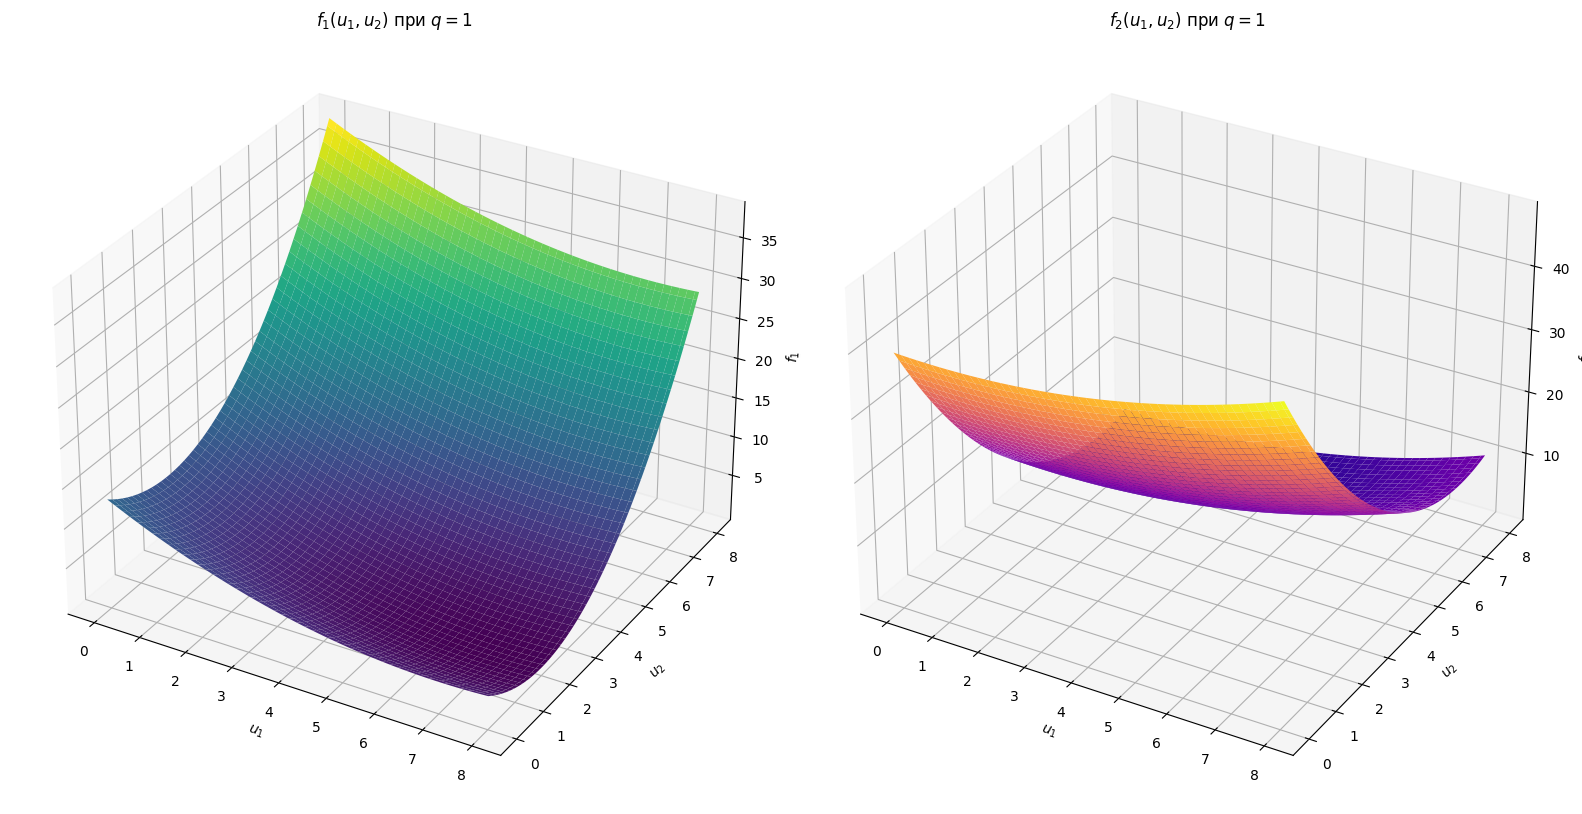

In [95]:
def v(q):
    return (q**2 * (q - 2)**2)

def f1(u1, u2, q=1):
    return 0.2 * (u1 - 7 * v(q))**2 + 0.8 * (u2 - 2 * v(q))**2

def f2(u1, u2, q=1):
    return 0.2 * (u1 - v(q))**2 + 0.8 * (u2 - 7 * v(q))**2

# Создаем сетку для u1 и u2 от 0 до 8
u1_vals = np.linspace(0, 8, 100)
u2_vals = np.linspace(0, 8, 100)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

# Значения функций f1 и f2 для каждой точки сетки
F1 = f1(U1, U2)
F2 = f2(U1, U2)


# Построение 3D-графиков для f1 и f2
fig = plt.figure(figsize=(16, 8))

# График для f1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U1, U2, F1, cmap='viridis')
ax1.set_title('$f_1(u_1, u_2)$ при $q=1$')
ax1.set_xlabel('$u_1$')
ax1.set_ylabel('$u_2$')
ax1.set_zlabel('$f_1$')

# График для f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U1, U2, F2, cmap='plasma')
ax2.set_title('$f_2(u_1, u_2)$ при $q=1$')
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax2.set_zlabel('$f_2$')

plt.tight_layout()
plt.show()


Построение линий уровня

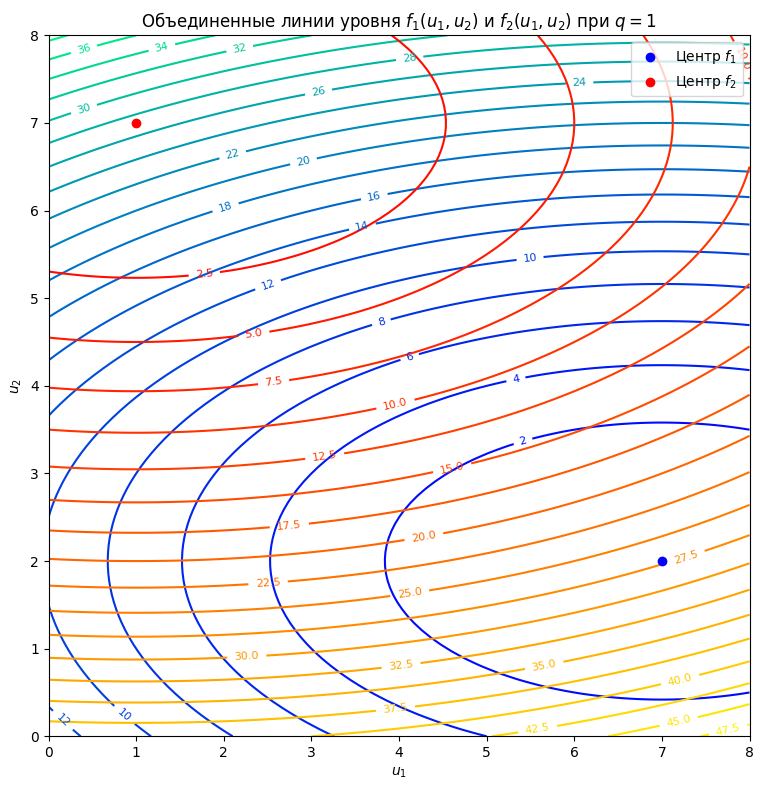

In [96]:
# Определяем функцию v(q)
def v(q):
    return (q**2 * (q - 2)**2)

# Определяем функции f1 и f2
def f1(u1, u2, q=1):
    return 0.2 * (u1 - 7 * v(q))**2 + 0.8 * (u2 - 2 * v(q))**2

def f2(u1, u2, q=1):
    return 0.2 * (u1 - v(q))**2 + 0.8 * (u2 - 7 * v(q))**2


# Сетка для u1 и u2 от 0 до 8
u1_vals = np.linspace(0, 8, 100)
u2_vals = np.linspace(0, 8, 100)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

# Значения функций f1 и f2 для каждой точки сетки
F1 = f1(U1, U2)
F2 = f2(U1, U2)

# Центры (посчитала аналитически)
center_f1 = (7, 2)  # минимум f1
center_f2 = (1, 7)  # минимум f2

fig, ax = plt.subplots(figsize=(8, 8))

# Линии уровня для f1
contour1 = ax.contour(U1, U2, F1, levels=20, cmap='winter')
ax.clabel(contour1, inline=True, fontsize=8)

# Линии уровня для f2
contour2 = ax.contour(U1, U2, F2, levels=20, cmap='autumn')
ax.clabel(contour2, inline=True, fontsize=8)

ax.scatter(*center_f1, color='blue', label='Центр $f_1$', zorder=5)  # Центр f1
ax.scatter(*center_f2, color='red', label='Центр $f_2$', zorder=5)   # Центр f2

ax.set_title('Объединенные линии уровня $f_1(u_1, u_2)$ и $f_2(u_1, u_2)$ при $q=1$')
ax.set_xlabel('$u_1$')
ax.set_ylabel('$u_2$')

# Сохраняем квадратную сетку
ax.set_aspect('equal')

# Легенда
ax.legend()

plt.tight_layout()
plt.show()


In [97]:
# Определяем частные производные функций f1 и f2
def d_f1(u1, u2, q=1):
    return 7 * v(q)

def d_f2(u1, u2, q=1):
    return 7 * v(q)


q_vals = np.arange(0, 2.4, 0.1)

# Создаем сетку для u1 и u2 от 0 до 8
u1_vals = np.linspace(0, 8, 100)
u2_vals = np.linspace(0, 8, 100)
U1, U2 = np.meshgrid(u1_vals, u2_vals)

results = []

for q in q_vals:
    u1_nash = d_f1(U1, U2, q)
    u2_nash = d_f2(U1, U2, q)
    F1 = f1(u1_nash, u2_nash)
    F2 = f2(u1_nash, u2_nash)
    F0 = max(F1, F2)

    # Добавляем результаты в список
    results.append({'q': q, 'u1_Nash': u1_nash, 'u2_Nash': u2_nash,
                    'F1': F1, 'F2': F2, 'F0': F0})

# Преобразуем список в DataFrame
df = pd.DataFrame(results)

# Вывод таблицы
print(df)

      q  u1_Nash  u2_Nash         F1         F2         F0
0   0.0   0.0000   0.0000  13.000000  39.400000  39.400000
1   0.1   0.2527   0.2527  11.547657  36.532537  36.532537
2   0.2   0.9072   0.9072   8.379812  29.699492  29.699492
3   0.3   1.8207   1.8207   5.390748  21.594828  21.594828
4   0.4   2.8672   2.8672   4.017636  14.361316  14.361316
5   0.5   3.9375   3.9375   4.878906   9.228906   9.228906
6   0.6   4.9392   4.9392   7.760497   6.500977   7.760497
7   0.7   5.7967   5.7967  11.821531   5.760011  11.821531
8   0.8   6.4512   6.4512  15.910781   6.184061  15.910781
9   0.9   6.8607   6.8607  18.905004   6.885084  18.905004
10  1.0   7.0000   7.0000  20.000000   7.200000  20.000000
11  1.1   6.8607   6.8607  18.905004   6.885084  18.905004
12  1.2   6.4512   6.4512  15.910781   6.184061  15.910781
13  1.3   5.7967   5.7967  11.821531   5.760011  11.821531
14  1.4   4.9392   4.9392   7.760497   6.500977   7.760497
15  1.5   3.9375   3.9375   4.878906   9.228906   9.2289